In [1]:
import os
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

In [4]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url, delimiter=",")

In [5]:
print(df.head())

   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [8]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [12]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [13]:
df['date']=pd.to_datetime(df['date'], errors = 'coerce')
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace = True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace = True)

In [14]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


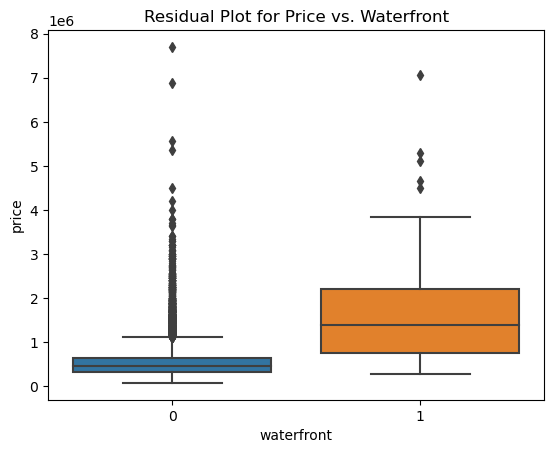

In [15]:
#visualisation des données 
sns.boxplot(data = df , x='waterfront', y = 'price')
plt.ylabel('price')
plt.xlabel('waterfront')
plt.title('Residual Plot for Price vs. Waterfront')
plt.show() 

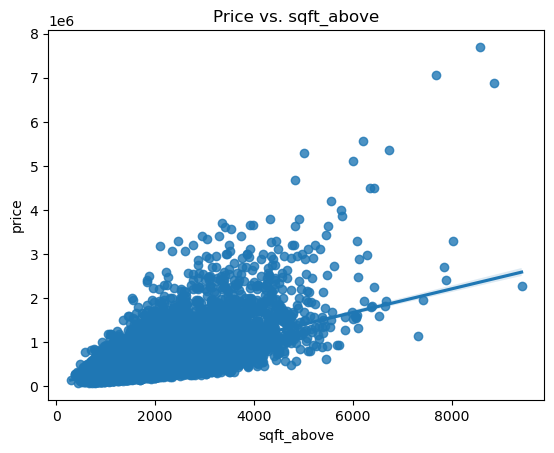

In [16]:
sns.regplot(data=df,x='sqft_above', y='price')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title('Price vs. sqft_above')
plt.show()

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_result = df[numeric_columns].corr()['price'].sort_values()
print(correlation_result)

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


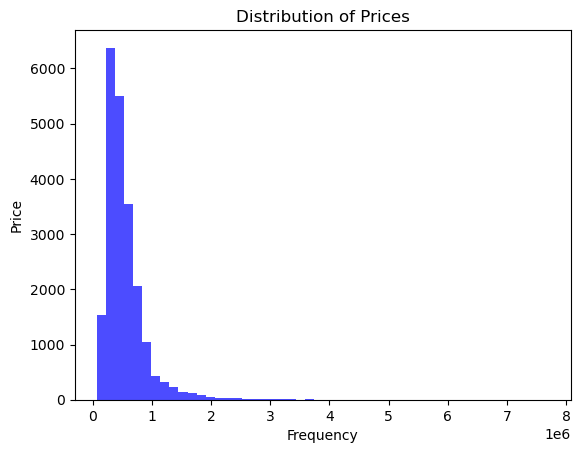

In [22]:
plt.hist(df['price'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.show()

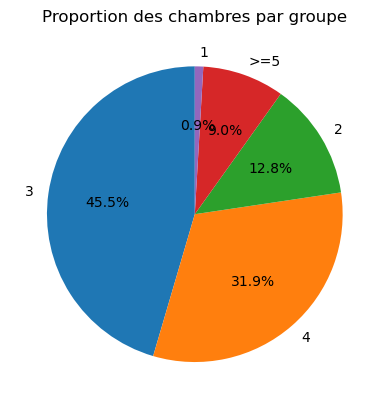

In [44]:
df['bedrooms_grouped'] = pd.cut(df['bedrooms'], bins=[0, 1, 2, 3, 4, float('inf')], labels=['1', '2', '3', '4','>=5'])
bedroom_data = df['bedrooms_grouped'].value_counts()
plt.pie(bedroom_data, labels=bedroom_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion des chambres par groupe')
plt.show()

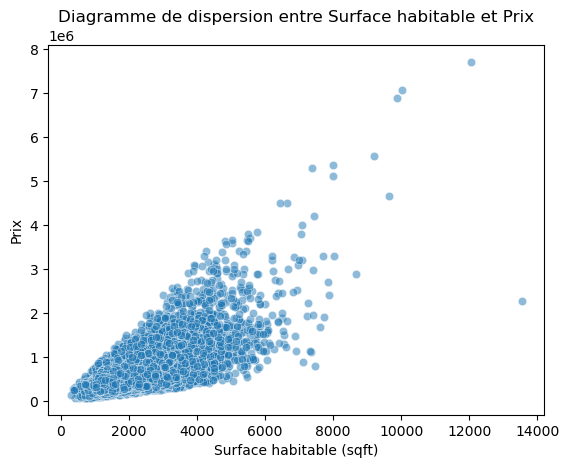

In [48]:
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.xlabel('Surface habitable (sqft)')
plt.ylabel('Prix')
plt.title('Diagramme de dispersion entre Surface habitable et Prix')
plt.show()

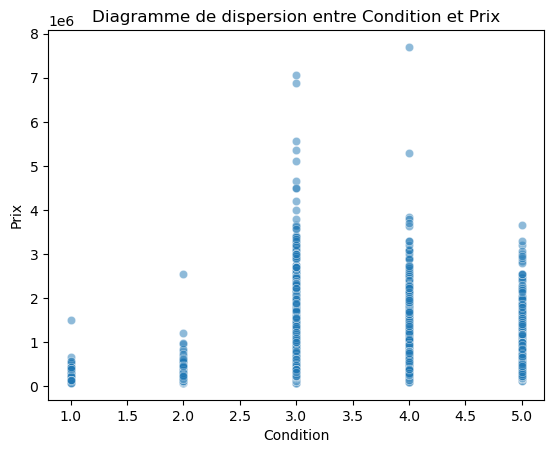

In [49]:
sns.scatterplot(x='condition', y='price', data=df, alpha=0.5)
plt.xlabel('Condition')
plt.ylabel('Prix')
plt.title('Diagramme de dispersion entre Condition et Prix')
plt.show()

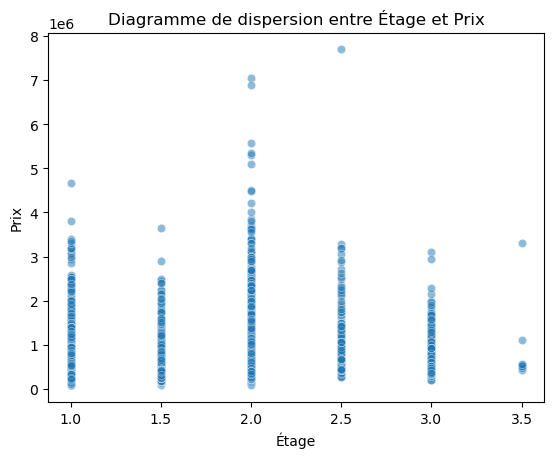

In [50]:
sns.scatterplot(x='floors', y='price', data=df, alpha=0.5)
plt.xlabel('Étage')
plt.ylabel('Prix')
plt.title('Diagramme de dispersion entre Étage et Prix')
plt.show()

In [52]:
# Linear Regression
X = df[['sqft_living']]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [53]:
print("r_carré en entrainement est : ",lm.score(x_train,y_train))
print("r_carré en test est : ",lm.score(x_test,y_test))

r_carré en entrainement est :  0.49238383875829517
r_carré en test est :  0.49406905389089006


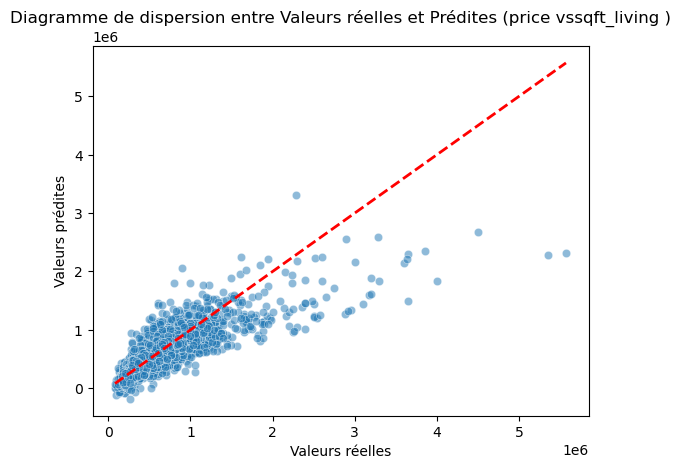

In [70]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Diagramme de dispersion entre Valeurs réelles et Prédites (price vssqft_living )')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.show()

In [58]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.6614029431732666


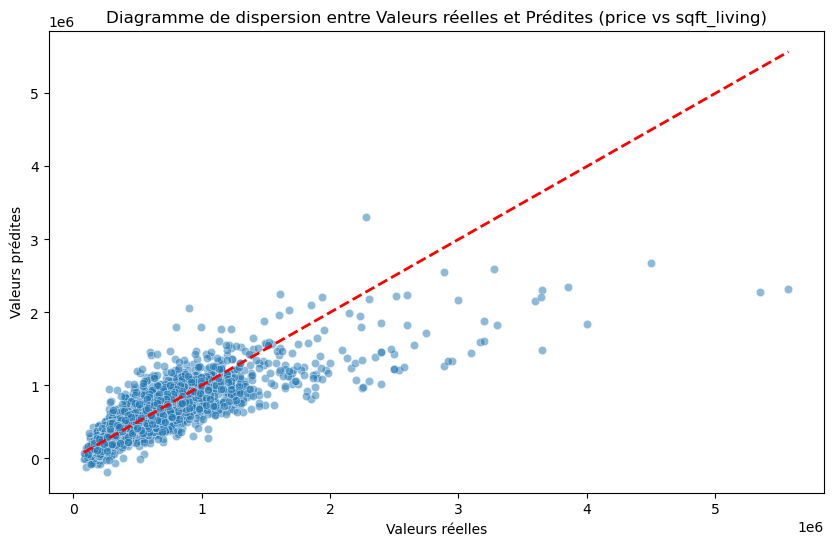

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Diagramme de dispersion entre Valeurs réelles et Prédites (price vs sqft_living)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.show()

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
X = X.astype(float)
pipe.fit(X,Y)
ypipe=pipe.predict(X)
r_squared = r2_score(Y, ypipe)
print(r_squared)

0.7513404101380663


In [74]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [75]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1) 
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(r2_ridge)

0.6478759163939112


In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
ridge_poly = Ridge(alpha=0.1)  # Set regularization parameter to 0.1
ridge_poly.fit(x_train_poly, y_train)
y_pred_ridge_poly = ridge_poly.predict(x_test_poly)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
print(r2_ridge_poly)

0.7002744259992868
